In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib] 4/5 [matplotlib]


In [8]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use("dark_background")
# plt.style.use("seaborn-v0_8")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In linear regression, $Xw = y$ is overdetermined. So, $y \notin C(X)$ and often we cannot solve the system exactly. We project $y$ onto the columnspace $C(X)$ and solve for $\hat{w}$ instead to have an estimate that minimizes squared-error.

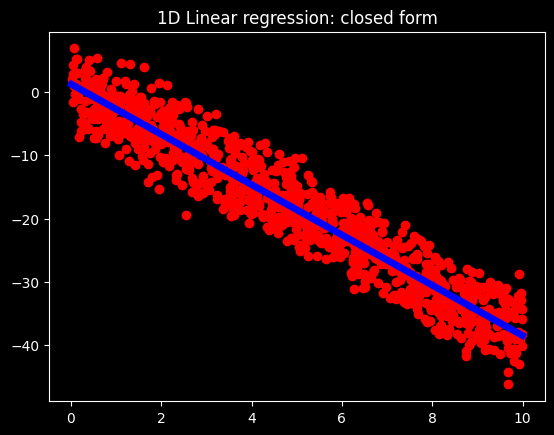

In [9]:
def produce_data(m, n, lo=0, hi=10):    
    X = np.random.uniform(low=lo, high=hi, size=(m, n))
    w = np.random.uniform(low=-5, high=5, size=(n, 1))
    b = np.random.uniform(low=-5, high=5, size=(m, 1))
    noise = np.random.normal(loc=1, scale=2, size=(m, 1))

    y = X @ w + b + noise
    return X, y

def fit_closed_form(x, y):
    A = np.column_stack((x, np.ones(x.shape[0])))
    b = y
    
    w = la.inv(A.T @ A) @ A.T @ b
    return w

X, y = produce_data(1000, 1)
w_fit = fit_closed_form(X, y)
x_fit = np.array([X[:, 0].min(), X[:, 0].max()])
x_fit_bias = np.column_stack((x_fit, np.ones(x_fit.shape[0])))
y_fit = x_fit_bias @ w_fit


plt.scatter(X, y, color="red")
plt.plot(x_fit, y_fit, color="blue", lw=5)
plt.title("1D Linear regression: closed form")
plt.show()

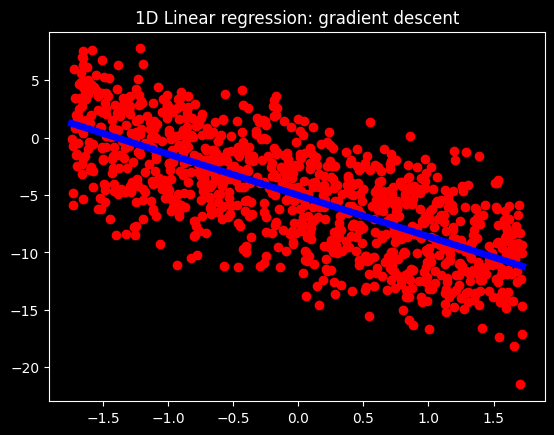

In [13]:
def fit_grad(X, y, niter=1000, alpha=1e-6):
    A = np.column_stack((X, np.ones(X.shape[0])))
    b = y
    w = np.zeros((A.shape[-1], 1))
    for _ in range(niter):
        error = A @ w - b
        grad = 2 * A.T @ error
        # Without small alpha
        # RuntimeWarning: overflow encountered in matmul
        #   error = A @ w - b
        w -= alpha * grad
    return w

X, y = produce_data(1000, 1)

# Without normalization:
# RuntimeWarning: overflow encountered in matmul
#   grad = 2 * A.T @ error
X = (X - X.mean(axis=0))/X.std(axis=0)

w_fit = fit_grad(X, y, niter=10_000)

x_fit = np.array([ X[:, 0].min(), X[:, 0].max() ])
x_fit_bias = np.column_stack((x_fit, np.ones(x_fit.shape[0])))
y_fit_grad = x_fit_bias @ w_fit

plt.scatter(X, y, color="red")
plt.plot(x_fit, y_fit_grad, color="blue", lw=5)
plt.title("1D Linear regression: gradient descent")
plt.show()

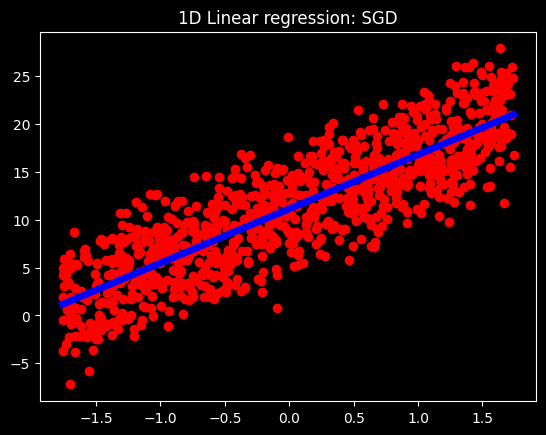

In [15]:
def fit_grad_stochastic(X, y, niter=1000, alpha=1e-6, nsample=10):
    m, n = X.shape
    A = np.column_stack((X, np.ones(m)))
    b = y
    w = np.zeros((A.shape[-1], 1))
    for _ in range(niter):
        idx = np.random.choice(m, nsample, replace=False)
        A_, b_ = A[idx], b[idx]
        error = A_ @ w - b_
        grad = 2 * A_.T @ error
        # If alpha is not small, may diverge
        w -= alpha * grad
    return w

X, y = produce_data(1000, 1)
# Overlow without normalization
X = (X-X.mean(axis=0))/X.std(axis=0)

w_fit = fit_grad(X, y, niter=10_000)

x_fit = np.array([ X[:, 0].min(), X[:, 0].max() ])
x_fit_bias = np.column_stack((x_fit, np.ones(x_fit.shape[0])))
y_fit_grad = x_fit_bias @ w_fit

plt.scatter(X, y, color="red")
plt.plot(x_fit, y_fit_grad, color="blue", lw=5)
plt.title("1D Linear regression: SGD")
plt.show()

In [156]:
X, y = produce_data(10, 3)
X = (X-X.mean(axis=0))/X.std(axis=0)

w_fit_closed = fit_closed_form(X, y)

w_fit_grad = fit_grad(X, y, niter=1_000_000)
print(f"w_fit_grad ~ w_fit_closed: {np.allclose(w_fit_closed, w_fit_grad, atol=1e-6)}")

w_fit_sgd = fit_grad_stochastic(X, y, niter=1_000_000)
print(f"w_fit_sgd ~ w_fit_closed: {np.allclose(w_fit_closed, w_fit_sgd, atol=1e-6)}")

w_fit_grad ~ w_fit_closed: True
w_fit_sgd ~ w_fit_closed: True
